<a href="https://colab.research.google.com/github/cloudhood/learning-basics/blob/main/notebooks/numpy_calculating_prediction_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python version of Stephan Kolassa's R code in [Calculating accuracy of prediction](https://stats.stackexchange.com/questions/580092/calculating-accuracy-of-prediction/580101#580101)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
rng = np.random.default_rng(123)

In [3]:
true_prop = .8
preds = np.arange(0, 1, .01)
sims = rng.uniform(size=10_000) < true_prop

In [4]:
maes = [np.mean(np.abs(x - sims)) for x in preds]
mses = [np.mean((x - sims) ** 2) for x in preds]
logs = [
    -np.mean(
        np.concatenate(
            (np.repeat(np.log(x), np.sum(sims)),
             np.repeat(np.log(1 - x), np.sum(~sims)))
        )
    ) 
    for x in preds[1:-1]
]

In [5]:
def qplot(ax, y, title, x=preds, h_at = true_prop, xlabel="Predicted Proportion"):
    ax.plot(x, y)
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.axvline(h_at, color="red", alpha=.5, linestyle="--")

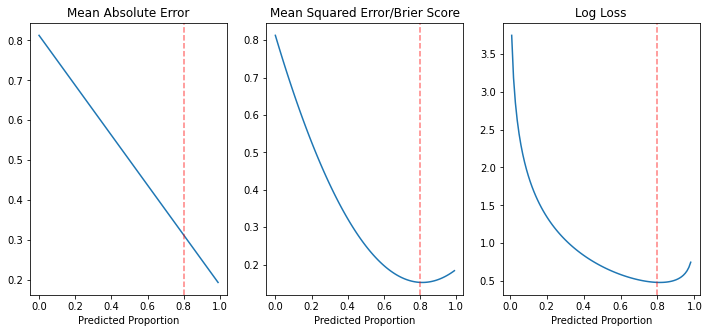

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))
qplot(ax[0], maes, "Mean Absolute Error")
qplot(ax[1], mses, "Mean Squared Error/Brier Score")
qplot(ax[2], logs, "Log Loss", x=preds[1:-1])
plt.show()